In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt # for data visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix as cm

%matplotlib inline

# Logistic Regression on Original Dataset
For this project, I decided to leverage Logistic Regression and Decision Tree to create a predictive model. The dataset I chose to train this model on was obtained courtesty of the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg and contains information on how core tumors relate to Malignant or Benign breast cancer diagnosis.

A reason I took interest in this dataset is because it classifies tumors based on the metrics of mean_radius, mean_texture, mean_perimeter, mean_area, and mean_smoothness along with the ultimate diagnosis for each individual, making it an excellent dataset to use for Machine Learning classification. Additionally, breast cancer is the second leading cause of cancer death in women and multiple members of my own family have been diagnosed with it in the past. For those reasons, I wanted to create a model that could predict diagnoses in order to help both patients and healthcare professionals alike assess the probability of a tumor being categorized as Malignant or Benign based on accumulating factors.

As mentioned, this notebook contains the documented procedure for training a Logistic Regression model based on this dataset. On the other hand, another notebook in this repository titled, "BreastCancer_DecisionTree.ipynb" contains the documented procedure for training a Decision Tree model using another dataset that was derived from this one. I have uploaded both datasets to the repo in case you would like to replicate this project or create your own models as well.

# Loading the CSV

In [2]:
df = pd.read_csv(r'C:\projects\Breast_cancer_data.csv', delimiter=",")
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

# Checking for Nulls

In [4]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

# Counting class distribution for Malignant (1) and Benign (0)

In [5]:
malignant = df[df['diagnosis'] == 1]
malignantcount = len(malignant)
print("There are a total of", malignantcount, "Malignant tumors in this dataset.")

There are a total of 357 Malignant tumors in this dataset.


In [6]:
benign = df[df['diagnosis'] == 0]
benigncount = len(benign)
print("There are a total of", benigncount, "Benign tumors in this dataset.")

There are a total of 212 Benign tumors in this dataset.


In [7]:
count = df.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

# Plotting the distribution of Malignant and Benign tumors and saving it as a PNG

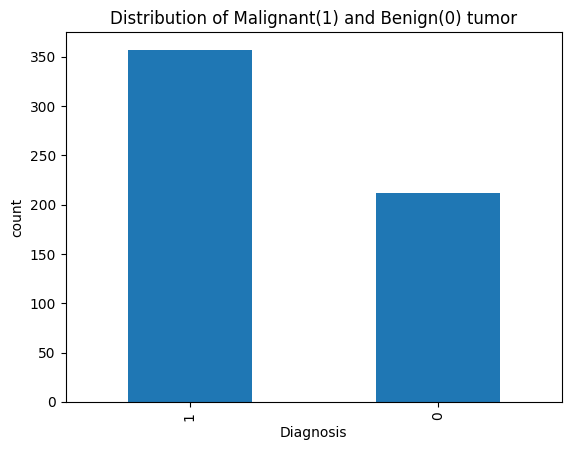

In [8]:
count.plot(kind='bar')
plt.title("Distribution of Malignant(1) and Benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count");
plt.savefig(r'C:\projects\distribution.png')
plt.show()

Note: If you ever want to save the figures you've created using Matplotlib, simply run "plt.savefig" and assign that a location on your local machine. It will save it there for you to use later in reports.

# Creating Pairplots to Determine best 2-Class Problem

In [9]:
y_target = df['diagnosis']

In [10]:
df.columns.values

array(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'], dtype=object)

In [11]:
df['target'] = df['diagnosis'].map({0:'B',1:'M'}) # converting the data into categorical

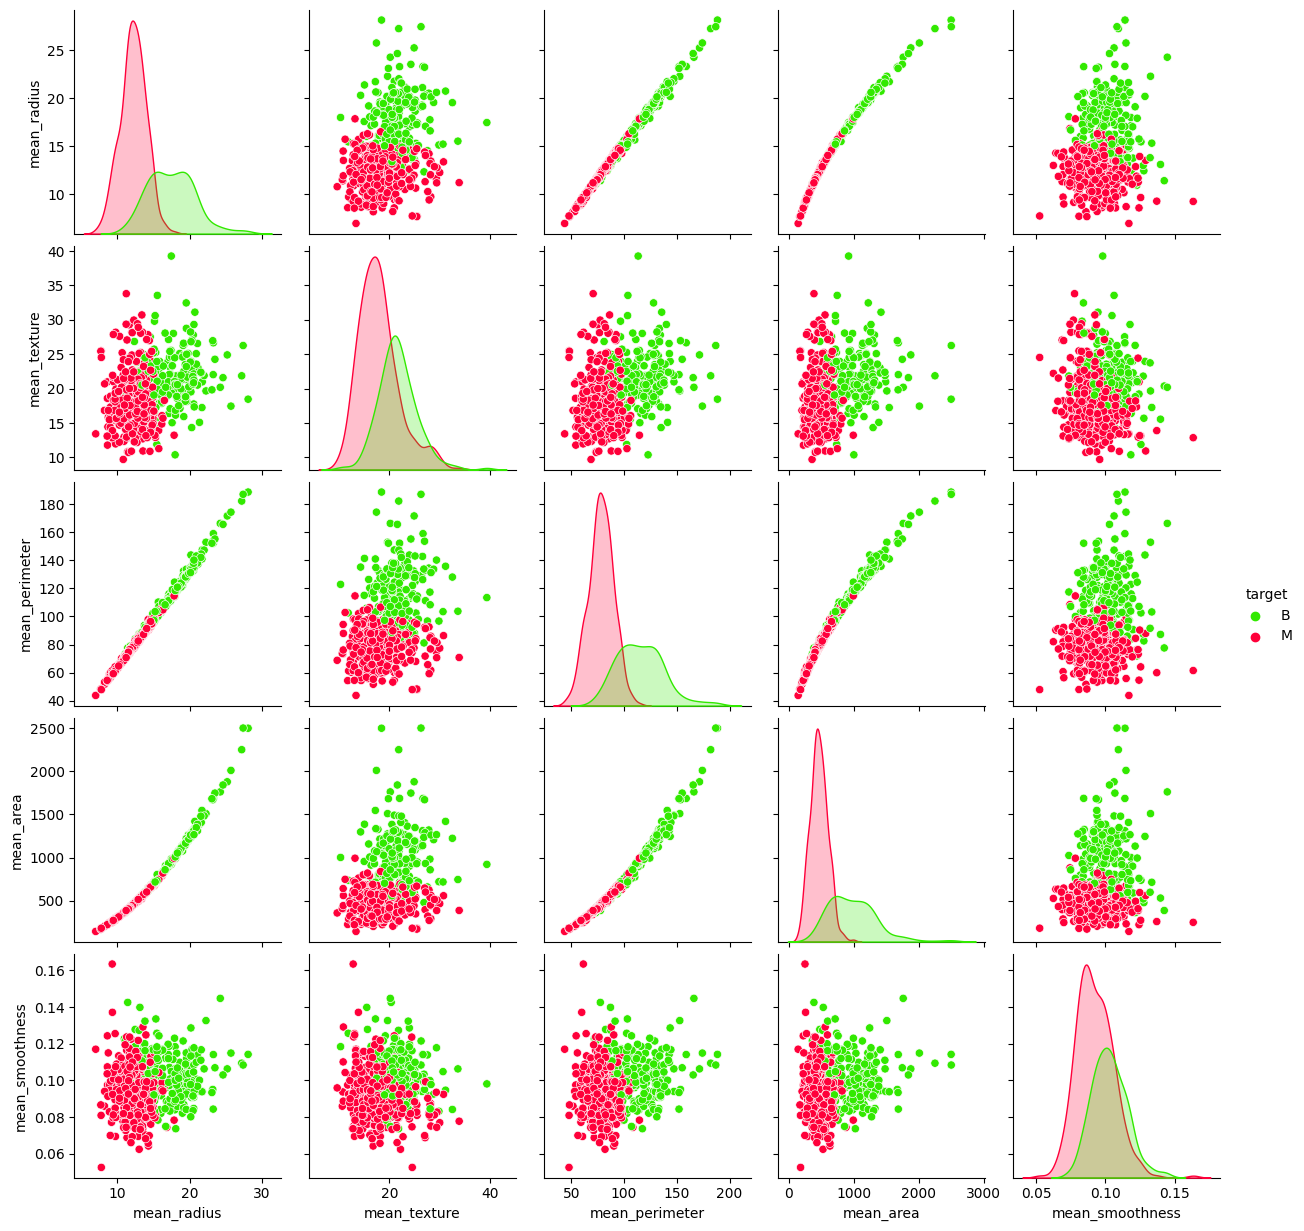

In [12]:
plots = sns.pairplot(df.drop('diagnosis', axis = 1), hue="target", palette='prism');

Based on this, I decided to choose the mean_perimeter and mean_texture plot for the model.

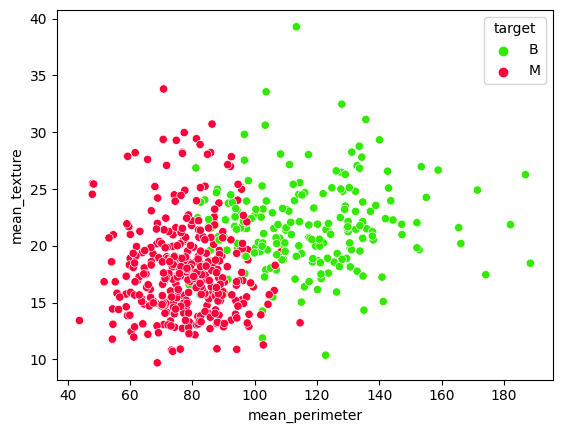

In [13]:
# choosing mean_perimeter and mean_texture plot

sns.scatterplot(x='mean_perimeter', y = 'mean_texture', data = df, hue = 'target', palette='prism');
plt.savefig(r'C:\projects\mean_perimetervsmean_texture.png')
plt.show()

# Training the Logistic Regression Model

In [14]:
# Assigning mean_perimeter and mean_texture as features since distribution appears most relevant

features = ['mean_perimeter', 'mean_texture']

In [15]:
X_feature = df[features]

In [16]:
# Splitting the dataset and holding 20% of data for testing, test_size = 0.2

X_train, X_test, y_train, y_test= train_test_split(X_feature, y_target, test_size=0.2, random_state = 42)

In [17]:
# Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

C:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


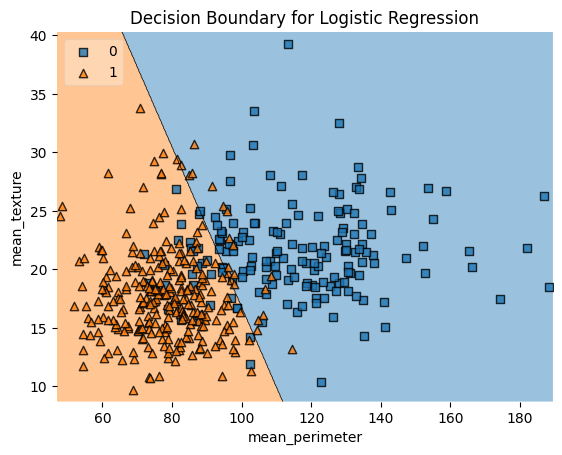

In [18]:
plot_decision_regions(X_train.values, y_train.values, clf=model, legend=2)
plt.title("Decision Boundary for Logistic Regression")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");
plt.savefig(r'C:\projects\LRDecisionBoundary.png')
plt.show()

# Determining the Model's Accuracy Score

In [19]:
y_pred = model.predict(X_test)

In [20]:
# Accuracy Score in %

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score for Logistic Regression:", accuracy*100, '%')

Accuracy score for Logistic Regression: 92.98245614035088 %


# Training another model based mean_perimeter and mean_texture

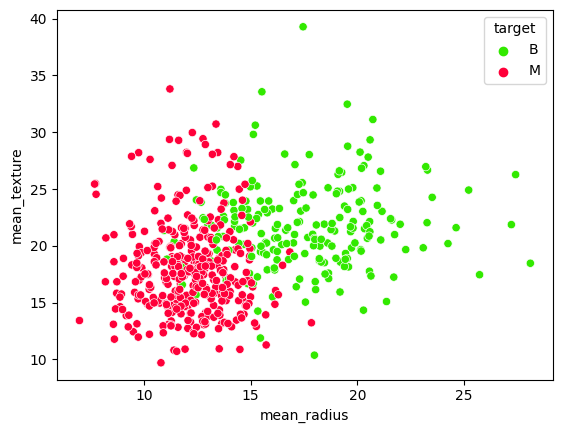

In [21]:
# choosing mean_perimeter and mean_texture plot

sns.scatterplot(x='mean_radius', y = 'mean_texture', data = df, hue = 'target', palette='prism');
plt.savefig(r'C:\projects\mean_radiusvsmean_texture.png')
plt.show()

In [22]:
# Assigning mean_radius and mean_texture as features 

features = ['mean_radius', 'mean_texture']

In [23]:
X_feature = df[features]

In [24]:
# Splitting the dataset and holding 20% of data for testing, test_size = 0.2

X_train, X_test, y_train, y_test= train_test_split(X_feature, y_target, test_size=0.2, random_state = 42)

In [25]:
# Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

C:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


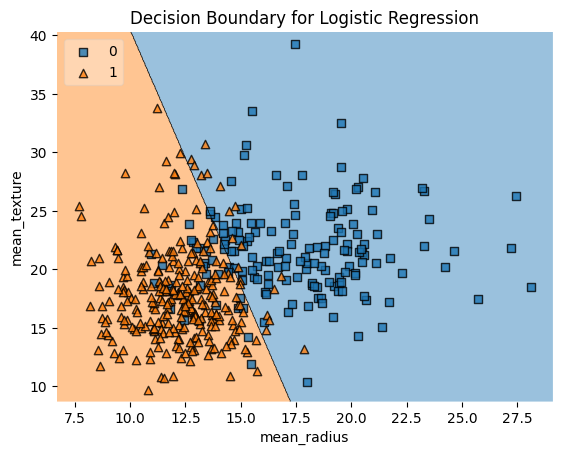

In [26]:
plot_decision_regions(X_train.values, y_train.values, clf=model, legend=2)
plt.title("Decision Boundary for Logistic Regression")
plt.xlabel("mean_radius")
plt.ylabel("mean_texture");
plt.savefig(r'C:\projects\LRDecisionBoundary2.png')
plt.show()

# Determining the Second Model's Accuracy Score

In [27]:
y_pred = model.predict(X_test)

In [28]:
# Accuracy Score in %

accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy score for Logistic Regression:", accuracy2*100, '%')

Accuracy score for Logistic Regression: 91.22807017543859 %


# Confusion Matrix for features = ['mean_radius', 'mean_texture']

In [29]:
cm1 = cm(y_test, y_pred)
cm1

array([[37,  6],
       [ 4, 67]], dtype=int64)

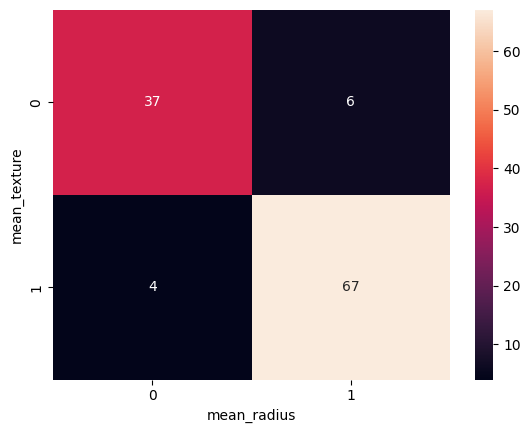

In [30]:
ax = plt.subplot()
sns.heatmap(cm1, annot=True, fmt = 'g', ax=ax)
ax.set_xlabel('mean_radius')
ax.set_ylabel('mean_texture')
plt.savefig(r'C:\projects\cm1.png')
plt.show()

This is a confusion matrix based on the mean_radius and mean_texture features. Confusion matrices are often used to visually display the True Positive, False Positive, False Negative, and True Negative values. In this case, 37 observations were predicted as Benign tumors and were actually Benign tumors, making them our True Positives. 6 observations were predicted as Benign tumors, but were actually Malignant tumors, making them our False Positives. 4 observations were predicted as Malignant tumors, but were actually Benign tumors, making them our False Negatives. And 67 observations were predicted as Malignant tumors and actually were Malignant tumors, making them our True Negatives.

In most cases, a confusion matrix may take the form of 1 indicating a positive and 0 indicating a negative, but due to the nature of our dataset, 0 is the positive as it means a Benign tumor and 1 is the negative as it indicates a Malignant tumor. In cases, where 1 = Yes and 0 = No, 1-1 would be True Positive, 1-0 would be False Positive, 0-1 would be False Negative, and 0-0 would be True Negative.

# Conclusions

Both Logistic Regression models yielded high accuracy scores and promising figures. Using the Decision Boundary charts for both models, one can estimate at what point between mean_texture and mean_perimeter as well as mean_texture and mean_radius where the prediction is likely to lie on either end of the spectrum.